In [1]:
# create data


import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture

# source: https://github.com/is0383kk/GMM-Gibbs/blob/main/gmm_gibbs.ipynb

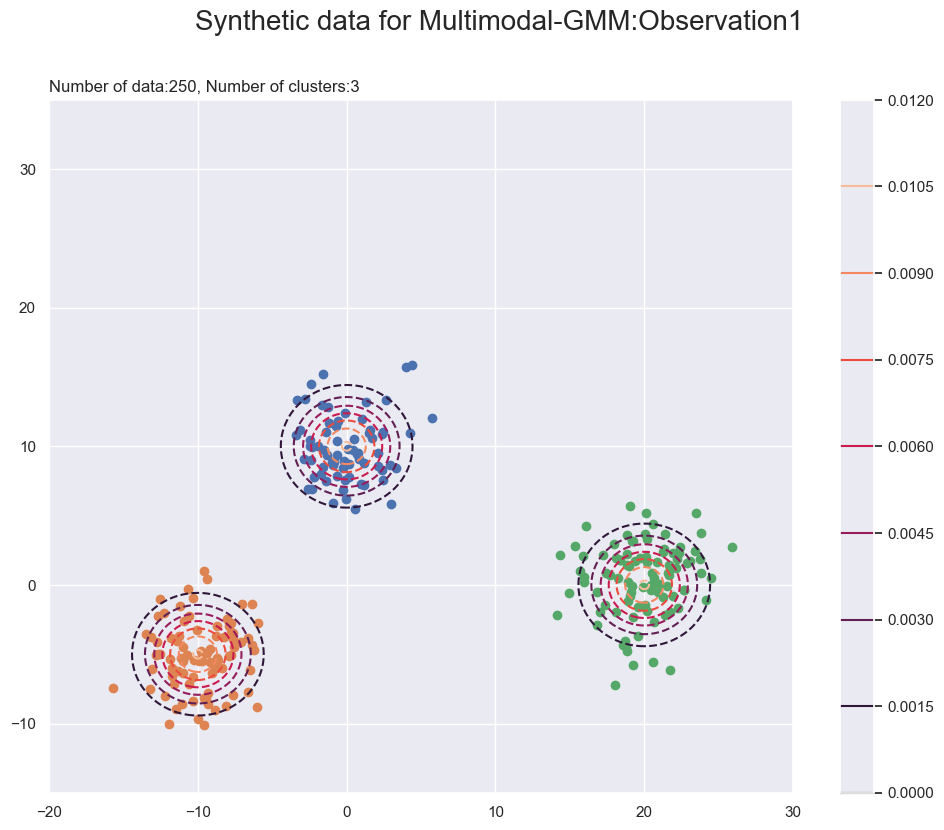

In [3]:
import pickle
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


K = 3 # Number of clusters
N = 250 # Number of data
pi_synthetic_k = np.array([0.3333, 0.3333, 0.3333]) # Mixing ratio for synthetic data

#(This value when the number of clusters is 3)
# Specify mean parameter for generating synthetic data
mu_synthetic_kd_1 = np.array( # This is observation1
    [[0, 10.0],
     [-10.0, -5.0],
     [20.0, 0.0]]
)

# Specify covariance matrix parameters for generating synthetic data
sigma2_synthetic_kdd_1 = np.array( # This is observation1
    [[[5.0, 0],
    [0, 5.0]],

     [[5.0, 0.0],
     [0.0, 5.0]],

     [[5.0, 0.0],
     [0.0, 5.0]]]
)

############################## Make synthetic data ##############################
z_synthetic_nk = np.random.multinomial(n=1, pvals=pi_synthetic_k, size=N)
_, z_synthetic_n = np.where(z_synthetic_nk == 1)
# x_nd_1 will be the observation1 of GMM
x_nd_1 = np.array([
    np.random.multivariate_normal(
        mean=mu_synthetic_kd_1[k], cov=sigma2_synthetic_kdd_1[k], size=1
    ).flatten() for k in z_synthetic_n
])

############################## Setting for graph ##############################
x_1_line_1 = np.linspace(
    np.min(mu_synthetic_kd_1[:, 0] - 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 0, 0])),
    np.max(mu_synthetic_kd_1[:, 0] + 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 0, 0])),
    num=300
)
x_2_line_1 = np.linspace(
    np.min(mu_synthetic_kd_1[:, 1] - 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 1, 1])),
    np.max(mu_synthetic_kd_1[:, 1] + 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 1, 1])),
    num=300
)
x_1_grid_1, x_2_grid_1 = np.meshgrid(x_1_line_1, x_2_line_1)
x_point_1 = np.stack([x_1_grid_1.flatten(), x_2_grid_1.flatten()], axis=1)
x_dim_1 = x_1_grid_1.shape



# Ovservation model
true_model_1 = 0
for k in range(K):
    tmp_density_1 = multivariate_normal.pdf(x=x_point_1, mean=mu_synthetic_kd_1[k], cov=sigma2_synthetic_kdd_1[k])
    true_model_1 += pi_synthetic_k[k] * tmp_density_1


# plot x_nd_1 graph
plt.figure(figsize=(12, 9))
for k in range(K):
    k_idx, = np.where(z_synthetic_n == k)
    plt.scatter(x=x_nd_1[k_idx, 0], y=x_nd_1[k_idx, 1], label='cluster:' + str(k + 1))
plt.contour(x_1_grid_1, x_2_grid_1, true_model_1.reshape(x_dim_1), linestyles='--')
plt.suptitle('Synthetic data for Multimodal-GMM:Observation1', fontsize=20)
plt.title('Number of data:' + str(N) + ', Number of clusters:' + str(K), loc='left')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-20, 30)
plt.ylim(-15, 35)
plt.colorbar()
# plt.savefig("./data1.png")
plt.show()
plt.close()

data = x_nd_1
labels = z_synthetic_n

data_pickle = {
    'data': data,
    'labels': labels
}

# Pickle for reading in Python
output = open('gmm_data_a' + ".pkl", "wb")
pickle.dump(data_pickle, output)
output.close()
# ############################## Save synthetic data as .txt files ##############################
# np.savetxt('./data_3_clusters.txt', x_nd_1)
# np.savetxt('./data_3_clusters_labels.txt', z_synthetic_n) # # True label (True z_n)

In [ ]:
K = 2 # Number of clusters
N = 250 # Number of data
pi_synthetic_k = np.array([0.3333, 0.3333, 0.3333]) # Mixing ratio for synthetic data

#(This value when the number of clusters is 3)
# Specify mean parameter for generating synthetic data
mu_synthetic_kd_1 = np.array( # This is observation1
    [[0, 5.0],
     [-10.0, -10.0],
     [5.0, -20.0]]
)

# Specify covariance matrix parameters for generating synthetic data
sigma2_synthetic_kdd_1 = np.array( # This is observation1
    [[[5.0, 0],
    [0, 5.0]],

     [[5.0, 0.0],
     [0.0, 5.0]],

     [[5.0, 0.0],
     [0.0, 5.0]]]
)

############################## Make synthetic data ##############################
z_synthetic_nk = np.random.multinomial(n=1, pvals=pi_synthetic_k, size=N)
_, z_synthetic_n = np.where(z_synthetic_nk == 1)
# x_nd_1 will be the observation1 of GMM
x_nd_1 = np.array([
    np.random.multivariate_normal(
        mean=mu_synthetic_kd_1[k], cov=sigma2_synthetic_kdd_1[k], size=1
    ).flatten() for k in z_synthetic_n
])

############################## Setting for graph ##############################
x_1_line_1 = np.linspace(
    np.min(mu_synthetic_kd_1[:, 0] - 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 0, 0])),
    np.max(mu_synthetic_kd_1[:, 0] + 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 0, 0])),
    num=300
)
x_2_line_1 = np.linspace(
    np.min(mu_synthetic_kd_1[:, 1] - 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 1, 1])),
    np.max(mu_synthetic_kd_1[:, 1] + 3 * np.sqrt(sigma2_synthetic_kdd_1[:, 1, 1])),
    num=300
)
x_1_grid_1, x_2_grid_1 = np.meshgrid(x_1_line_1, x_2_line_1)
x_point_1 = np.stack([x_1_grid_1.flatten(), x_2_grid_1.flatten()], axis=1)
x_dim_1 = x_1_grid_1.shape



# Ovservation model
true_model_1 = 0
for k in range(K):
    tmp_density_1 = multivariate_normal.pdf(x=x_point_1, mean=mu_synthetic_kd_1[k], cov=sigma2_synthetic_kdd_1[k])
    true_model_1 += pi_synthetic_k[k] * tmp_density_1


# plot x_nd_1 graph
plt.figure(figsize=(12, 9))
for k in range(K):
    k_idx, = np.where(z_synthetic_n == k)
    plt.scatter(x=x_nd_1[k_idx, 0], y=x_nd_1[k_idx, 1], label='cluster:' + str(k + 1))
plt.contour(x_1_grid_1, x_2_grid_1, true_model_1.reshape(x_dim_1), linestyles='--')
plt.suptitle('Synthetic data for Multimodal-GMM:Observation1', fontsize=20)
plt.title('Number of data:' + str(N) + ', Number of clusters:' + str(K), loc='left')
plt.xlabel('')
plt.ylabel('')
plt.colorbar()
# plt.savefig("./data1.png")
plt.show()
plt.close()